In [5]:
import pandas as pd
lien ="tableau_coeff.xlsx"
df = pd.read_excel(lien)

In [6]:
df

,Prix_de_vente,min,max,coeff
0,<20 000,0,20000,6500.000
1,20 000 - 30 000,20000,30000,7000.000
2,30 001 - 40 000,30001,40000,8500.000
3,40 001 - 50 000,40001,50000,0.145
4,50 001 - 60 000,50001,60000,0.130
5,60 001 - 70 000,60001,70000,0.115
6,70 001 - 90 000,70001,90000,0.110
7,90 001 - 120 000,90001,120000,0.095
8,120 001 - 150 000,120001,150000,0.090
9,150 001 - 180 000,150001,180000,0.085


In [7]:
def prix_nv(prix_net_vendeur):
    for i in range(0, len(df)):
        #print(prix_net_vendeur)
        #print(df['Prix_de_vente'][i])
        if prix_net_vendeur >= df['min'][i] and prix_net_vendeur <= df['max'][i]:
            coeff_temp = df['coeff'][i]
            prix_vente_temp = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i])
            #print(f'Coeff temporaire : ' ,coeff_temp)
            #print(f'prix_vente temporaire : ',prix_vente_temp)
            if prix_net_vendeur + (prix_net_vendeur * df['coeff'][i]) > df['min'][i+1] : 
                prix_vente = prix_net_vendeur + (prix_net_vendeur * df['coeff'][i+1])
                coeff = df['coeff'][i+1]
                return coeff, prix_vente
                #print(prix_vente, df['coeff'][i+1])
                #print(prix_net_vendeur)
                #print(f'Coeff : ' ,df['coeff'][i+1])
                #print(f'prix_vente : ',prix_vente)
            else :
                return coeff_temp, prix_vente_temp
                #print(prix_net_vendeur)
                #print(f'Coeff temporaire : ' ,coeff_temp)
                #print(f'prix_vente temporaire : ',prix_vente_temp)

In [8]:
prix_net_vendeur = int(input("Inserez le prix net_vendeur"))

print(prix_nv(prix_net_vendeur)[0], prix_nv(prix_net_vendeur)[1])

0.08 179280.0


In [ ]:
#test : 



In [48]:
Prix_net_vendeur = []
Coeff_selectionne = []
Prix_de_vente = []

for i in range(165_500,166_000, 1):
    prix_net_vendeur = Prix_net_vendeur.append(i)
    Coeff_selectionne.append(prix_nv(i)[0])
    Prix_de_vente.append(prix_nv(i)[1])


df_analyse= pd.DataFrame({
    "Prix net vendeur" : Prix_net_vendeur,
    "Coeff selectionne" : Coeff_selectionne,
    "Prix de vente" : Prix_de_vente
})

In [45]:
df_analyse

,Prix net vendeur,Coeff selectionne,Prix de vente
0,135000,0.090,147150.000
1,135001,0.090,147151.090
2,135002,0.090,147152.180
3,135003,0.090,147153.270
4,135004,0.090,147154.360
...,...,...,...
4995,139995,0.085,151894.575
4996,139996,0.085,151895.660
4997,139997,0.085,151896.745
4998,139998,0.085,151897.830


<Axes: >

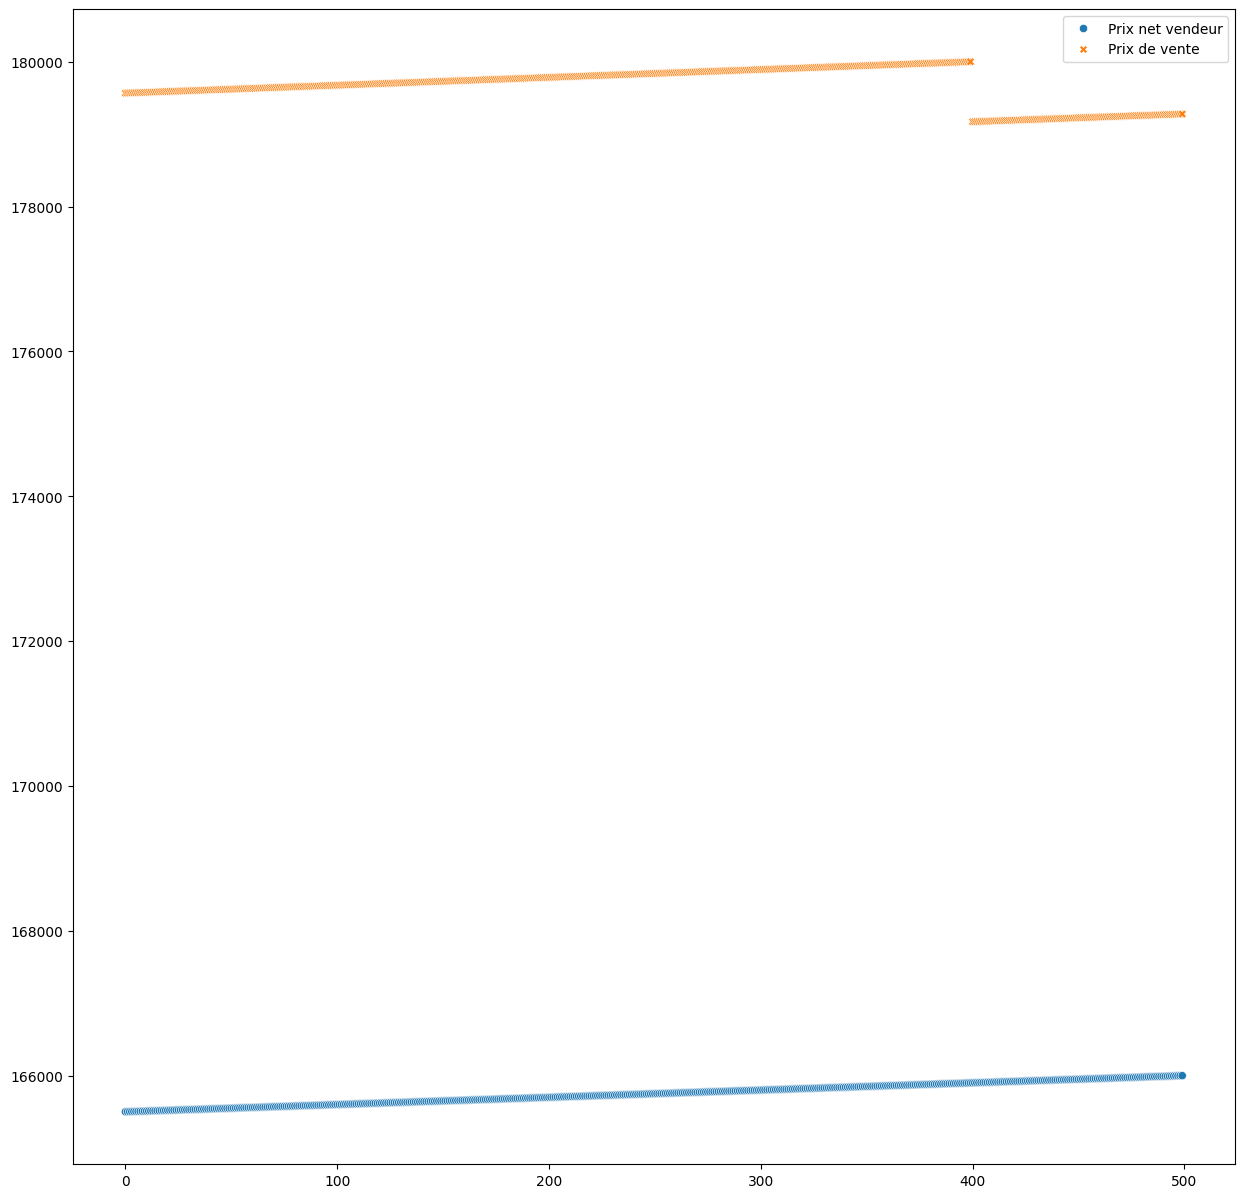

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.scatterplot(df_analyse[['Prix net vendeur', 'Prix de vente']])